# Introduction to PyCBC Inference
### Collin Capano

In this tutorial we go over how to set up and run `pycbc_inference` to do Bayesian Inference. We show how to run on simple analytic examples, and how to plot the results.

This tutorial largely follows the online documentation for `pycbc_inference`, which can be found [here](https://pycbc.org/pycbc/latest/html/inference.html). As `pycbc_inference` is a command-line tool, most of the commands below are carried out as if they were in a bash script using `!`.

### Prerequisites

We will need the most recent version of pycbc installed for this tutorial.

In [1]:
!pip install lalsuite pycbc

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from __future__ import print_function

from IPython.display import Image
from IPython.core.display import HTML

## Overview

The executable ``pycbc_inference`` is designed to sample the parameter space
and save the samples in an HDF file. A high-level description of the
``pycbc_inference`` algorithm is

 1. Read priors from a configuration file.

 2. Setup the model to use. If the model uses data, then:

    * Read gravitational-wave strain from a gravitational-wave model or use
      recolored fake strain.

    * Estimate a PSD.

 3. Run a sampler to estimate the posterior distribution of the model.

 4. Write the samples and metadata to an HDF file.

The model, sampler, parameters to vary and their priors are specified in a
configuration file, which is passed to the program using the ``--config-file``
option. Other command-line options determine what data to load (if the model
uses data) and what parallelization settings to use. For a full listing of all
options run ``pycbc_inference --help``.

We will begin by running on a simple analytic distribution, then move to more complicated results.

## Example: 2D normal distribution

Several analytic distributions are available to run tests on. These can be run
quickly on a laptop to check that a sampler is working properly.

This example demonstrates how to sample a 2D normal distribution with the
``emcee`` sampler.

### 1. Create (download) a config file

In order to do a parameter estimation run, we need a configuration file. This tells `pycbc_inference` what parameters we will sample, what prior to use, the model that we are sampling, and what sampler to use. For this example, a configuration file is in the `pycbc` examples, so we only need to download it:

In [3]:
!wget https://pycbc.org/pycbc/latest/html/_downloads/3037d45b00b73182902e13d3836da53e/normal2d.ini

--2019-05-12 09:11:36--  https://pycbc.org/pycbc/latest/html/_downloads/3037d45b00b73182902e13d3836da53e/normal2d.ini
Resolving pycbc.org (pycbc.org)... 185.199.108.153
Connecting to pycbc.org (pycbc.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210 [text/plain]
Saving to: ‘normal2d.ini.1’

normal2d.ini.1      100%[===================>]     210  --.-KB/s    in 0s      

2019-05-12 09:11:39 (4.77 MB/s) - ‘normal2d.ini.1’ saved [210/210]



You can view the file by going to the Jupyter notebook manager and clicking on `normal2d.ini`. When looking at the file, note the following:

 * We have selected the analytic distribution to run on by setting the `model` name to `test_normal`. This causes us to run using the [TestNormal](http://pycbc.org/pycbc/latest/html/pycbc.inference.models.html#pycbc.inference.models.analytic.TestNormal) model.
 * The number of dimensions of the analytic distribution are set by the number of parameters in the `[variable_params]` section.
 * The prior to use on parameter is set with the `[prior-{param}]` sections.
 * The names of the parameters do not matter, just that the prior sections use the same names.
 * The settings to use for the sampler (in this case `emcee`) are set in the `[sampler]` section.

### 2. Run `pycbc_inference`

Once we have a configuration file, we can run `pycbc_inference`. Since we are running on an analytic configuration, we do not need to provide any data arguments. All we need to provide is the config file, the output file, the number of processes to use and (optionally) a starting seed for the random number generator.

In [4]:
!pycbc_inference --verbose \
        --config-files normal2d.ini \
        --output-file normal2d.hdf \
        --nprocesses 2 \
        --seed 10

2019-05-12 09:12:10,742 Using seed 10
2019-05-12 09:12:10,743 Running with CPU support: 1 threads
2019-05-12 09:12:11,027 Reading configuration file
2019-05-12 09:12:11,028 Setting up model
2019-05-12 09:12:11,028 Setting up priors for each parameter
2019-05-12 09:12:11,029 No sampling_params section read from config file
2019-05-12 09:12:11,030 Setting up sampler
2019-05-12 09:12:11,045 Looking for checkpoint file
2019-05-12 09:12:11,045 Checkpoint not found or not valid
2019-05-12 09:12:11,045 Creating file normal2d.hdf.checkpoint
2019-05-12 09:12:11,104 Running sampler for 0 to 200 iterations
2019-05-12 09:12:28,175 Writing samples to normal2d.hdf.checkpoint with thin interval 1
2019-05-12 09:12:28,248 Writing samples to normal2d.hdf.bkup with thin interval 1
2019-05-12 09:12:28,363 Updating burn in
2019-05-12 09:12:28,366 Is burned in: True
2019-05-12 09:12:28,367 Burn-in iteration: 100
2019-05-12 09:12:28,367 Computing acls
2019-05-12 09:12:28,381 ACT: 11
2019-05-12 09:12:28,389 V

This created an output file called `normal2d.hdf`, which contains the samples.

### 3. Plot the posterior samples

There are a number of plotting programs in PyCBC for examining inference results. The most often used is `pycbc_inference_plot_posterior`. This program reads the output hdf file and plots the posteriors. Let's run that to see our results:

In [5]:
!pycbc_inference_plot_posterior --verbose \
        --input-file normal2d.hdf \
        --output-file posterior-normal2d.png \
        --parameters x y \
        --plot-scatter \
        --plot-contours \
        --plot-marginal \
        --z-arg 'loglikelihood:$\log p(h|\vartheta)$'

2019-05-12 09:14:49,613 Reading input file normal2d.hdf
2019-05-12 09:14:49,614 Loading samples
2019-05-12 09:14:49,627 Using 10000 samples
2019-05-12 09:14:49,627 Getting samples for colorbar
2019-05-12 09:14:49,634 Plotting
2019-05-12 09:14:53,464 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0 to DejaVu Sans (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-12 09:14:53,470 findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
2019-05-12 09:14:53,474 findfont: Matching :family=STIXSizeOneSym:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXSizeOneSym (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/

2019-05-12 09:14:54,536 STREAM 'IHDR' 16 13
2019-05-12 09:14:54,536 STREAM 'sBIT' 41 4
2019-05-12 09:14:54,537 'sBIT' 41 4 (unknown)
2019-05-12 09:14:54,537 STREAM 'pHYs' 57 9
2019-05-12 09:14:54,537 STREAM 'tEXt' 78 57
2019-05-12 09:14:54,537 STREAM 'IDAT' 147 8192
2019-05-12 09:14:55,193 Done


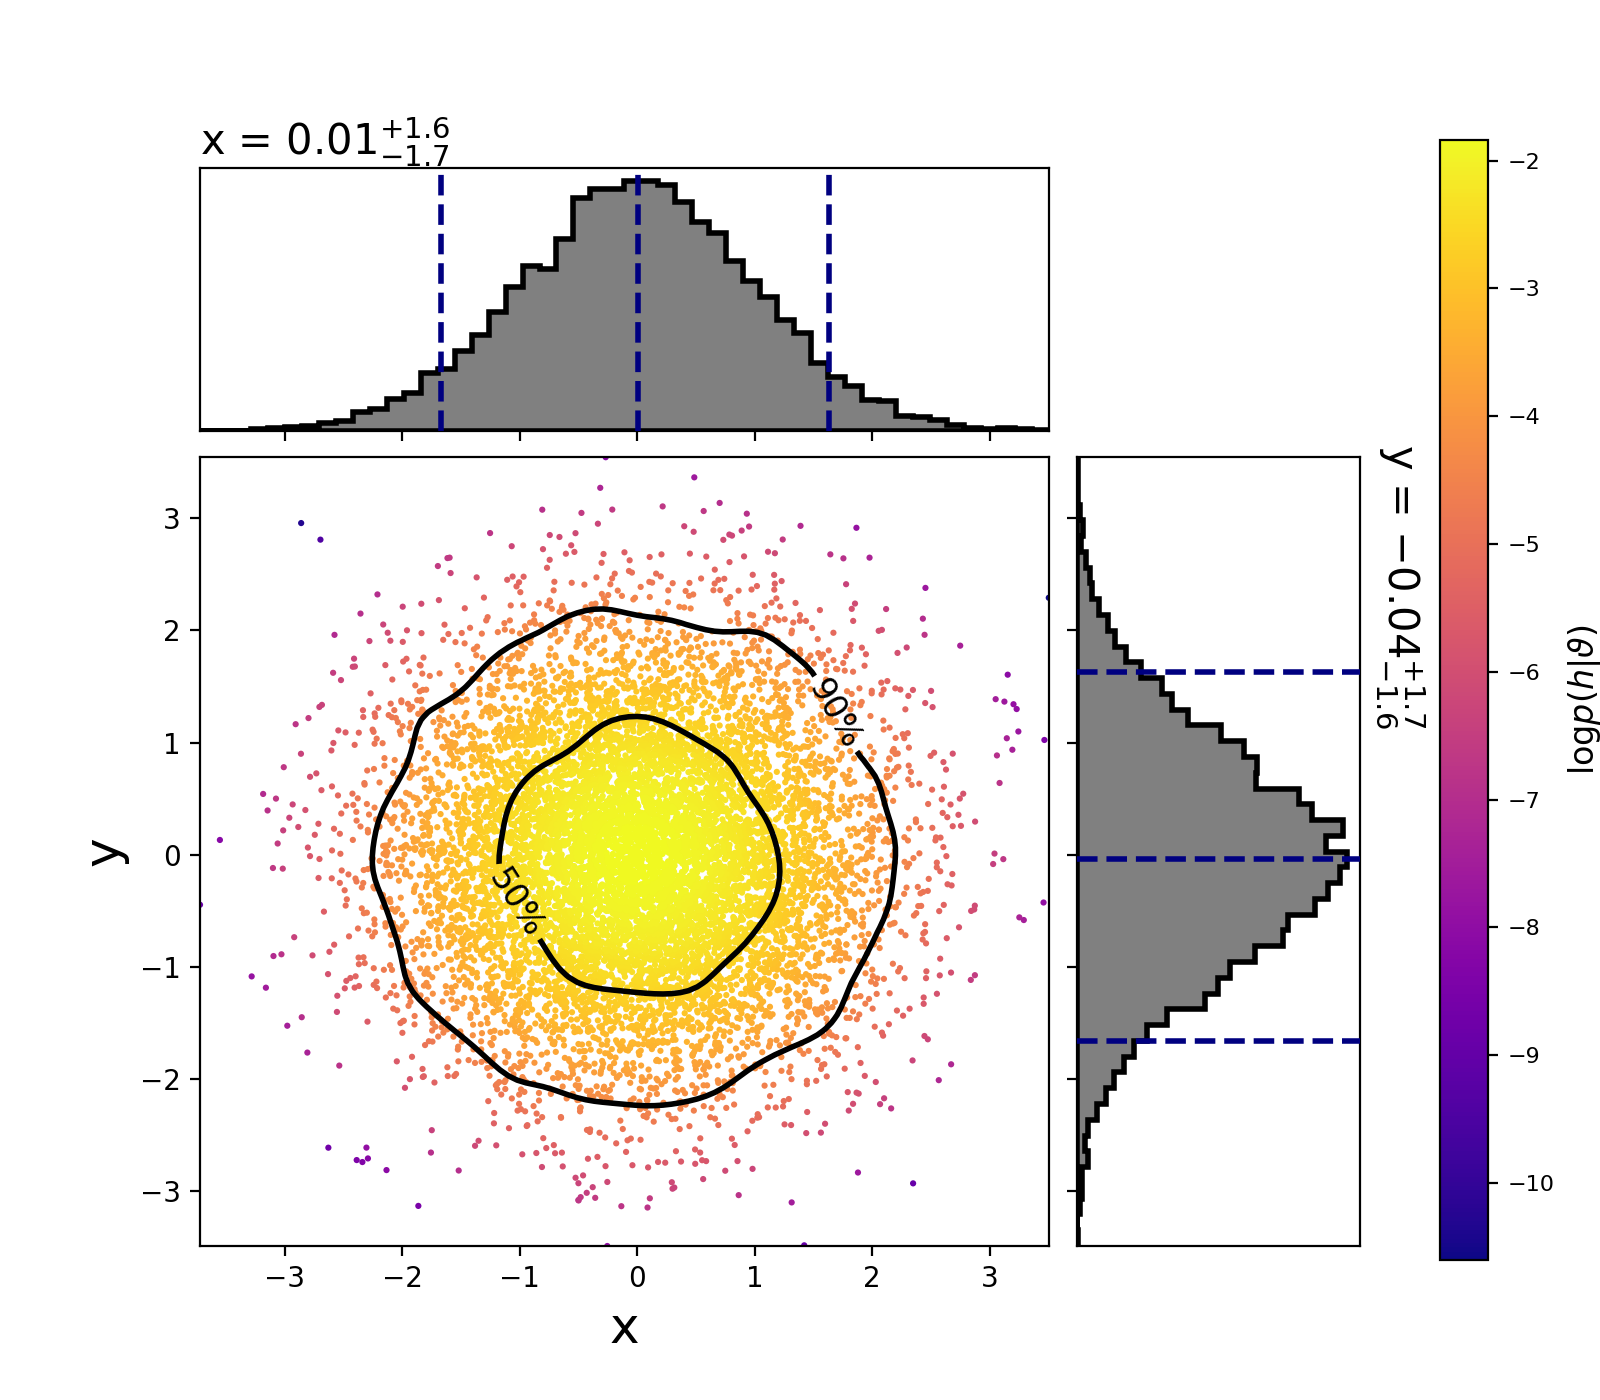

In [6]:
Image(filename="posterior-normal2d.png", width=640, height=480)

The scatter points show each walker's position after the last iteration. The
points are colored by the log likelihood at that point, with the 50th and 90th
percentile contours drawn.

#### Alternatively, we can create a density plot of the posterior:

In [7]:
!pycbc_inference_plot_posterior --verbose \
        --input-file normal2d.hdf \
        --output-file density-normal2d.png \
        --parameters x y \
        --plot-density \
        --plot-contours \
        --plot-marginal \
        --contour-color white

2019-05-12 09:15:07,789 Reading input file normal2d.hdf
2019-05-12 09:15:07,790 Loading samples
2019-05-12 09:15:07,804 Using 10000 samples
2019-05-12 09:15:07,804 Plotting
2019-05-12 09:15:11,493 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0 to DejaVu Sans (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-12 09:15:11,500 findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
2019-05-12 09:15:11,504 findfont: Matching :family=STIXSizeOneSym:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXSizeOneSym (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOn

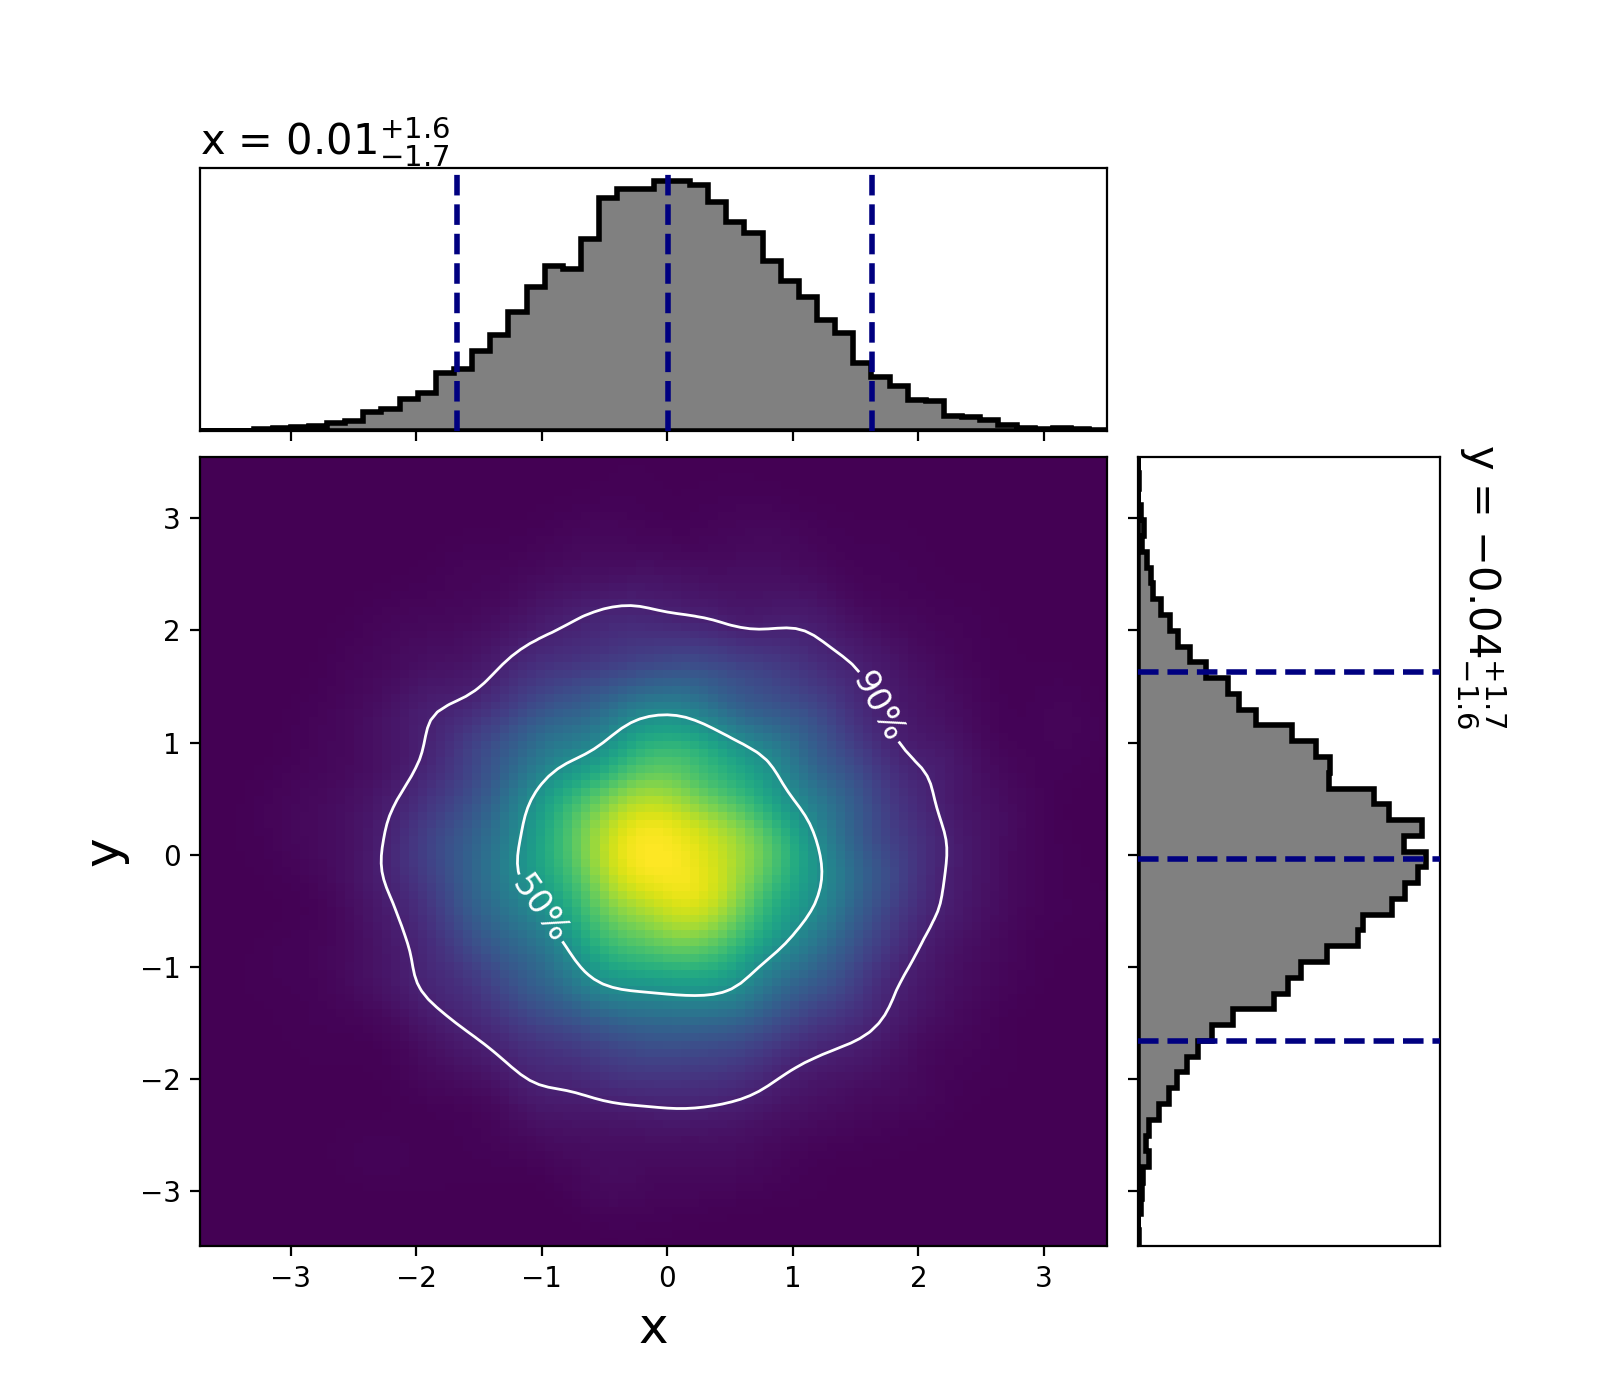

In [8]:
Image(filename="density-normal2d.png", width=640, height=480)

## 4. Diagnostic plots (MCMC)

### The autocorrelation function

The program `pycbc_inference_plot_acf` averages each parameter chain over all of the walkers, then calculates the [autocorrelation function](http://pycbc.org/pycbc/latest/html/pycbc.filter.html#pycbc.filter.autocorrelation.calculate_acf) (ACF) and plots it. By default, the autocorrelation function is only calculated over the iterations post burn-in (in this case, the second half of the chains).

In [25]:
!pycbc_inference_plot_acf --input-file normal2d.hdf \
    --output-file plotacf.png \
    --parameters x y \
    --verbose

2019-05-12 09:27:37,438 Loading parameters
2019-05-12 09:27:37,438 Reading input file normal2d.hdf
2019-05-12 09:27:37,440 Calculating autocorrelation functions
2019-05-12 09:27:37,769 Plotting autocorrelation functions
2019-05-12 09:27:37,782 Parameter x
2019-05-12 09:27:37,784 Parameter y
2019-05-12 09:27:37,807 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-12 09:27:37,996 STREAM 'IHDR' 16 13
2019-05-12 09:27:37,996 STREAM 'sBIT' 41 4
2019-05-12 09:27:37,996 'sBIT' 41 4 (unknown)
2019-05-12 09:27:37,996 STREAM 'pHYs' 57 9
2019-05-12 09:27:37,996 STREAM 'tEXt' 78 57
2019-05-12 09:27:37,996 STREAM 'IDAT' 147 8192
2019-05-12 09:27:38,085 Done


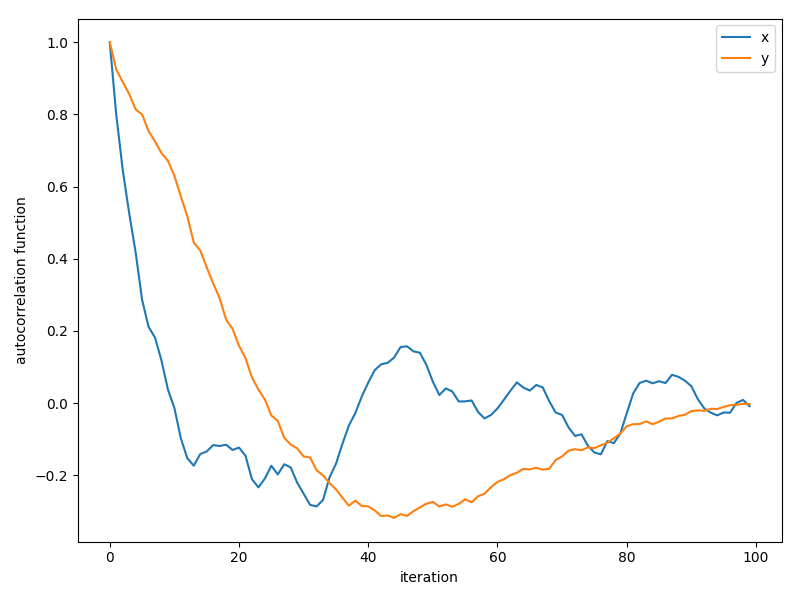

In [26]:
Image(filename="plotacf.png", width=640, height=480)

### The autocorrelation time

The program `pycbc_inference_plot_acl` calculates and plots the [autocorrelation length](http://pycbc.org/pycbc/latest/html/pycbc.filter.html#pycbc.filter.autocorrelation.calculate_acl) (ACL) of each walker separately and histograms the result.

In [12]:
!pycbc_inference_plot_acl --input-file normal2d.hdf \
    --output-file plotacl.png \
    --verbose

2019-05-10 23:09:46,621 Reading input file normal2d.hdf
2019-05-10 23:09:46,622 Calculating autocorrelation length
2019-05-10 23:09:52,179 Plotting autocorrelation lengths
2019-05-10 23:09:52,214 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-10 23:09:52,357 STREAM 'IHDR' 16 13
2019-05-10 23:09:52,357 STREAM 'sBIT' 41 4
2019-05-10 23:09:52,357 'sBIT' 41 4 (unknown)
2019-05-10 23:09:52,357 STREAM 'pHYs' 57 9
2019-05-10 23:09:52,357 STREAM 'tEXt' 78 57
2019-05-10 23:09:52,357 STREAM 'IDAT' 147 8192
2019-05-10 23:09:52,404 Done


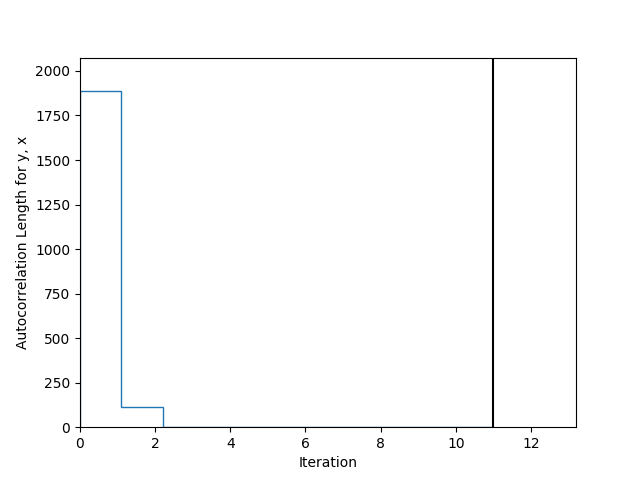

In [13]:
Image(filename="plotacl.png", width=640, height=480)

### Chain plots

The program `pycbc_inference_plot_samples` will plot each parameter as a function of iteration.

Note that we provide `--thin-start 0` and `--thin-interval 1` arguments. This is so we can see the entire chain, with every iteration plotted. Without them, the program will read samples starting from the burn in iteration (in this case, the halfway point), thinned by the autocorrelation length. This is true of any program that has these `thin-start/thin-interval` options.

In [27]:
!pycbc_inference_plot_samples --verbose \
    --input-file normal2d.hdf \
    --output-file samples_chain.png \
    --parameters x y \
    --thin-start 0 \
    --thin-interval 1

2019-05-12 09:27:59,048 Reading input file normal2d.hdf
2019-05-12 09:27:59,049 Plotting samples
2019-05-12 09:28:04,003 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-12 09:28:04,238 STREAM 'IHDR' 16 13
2019-05-12 09:28:04,239 STREAM 'sBIT' 41 4
2019-05-12 09:28:04,239 'sBIT' 41 4 (unknown)
2019-05-12 09:28:04,239 STREAM 'pHYs' 57 9
2019-05-12 09:28:04,239 STREAM 'tEXt' 78 57
2019-05-12 09:28:04,239 STREAM 'IDAT' 147 8192
2019-05-12 09:28:04,379 Done


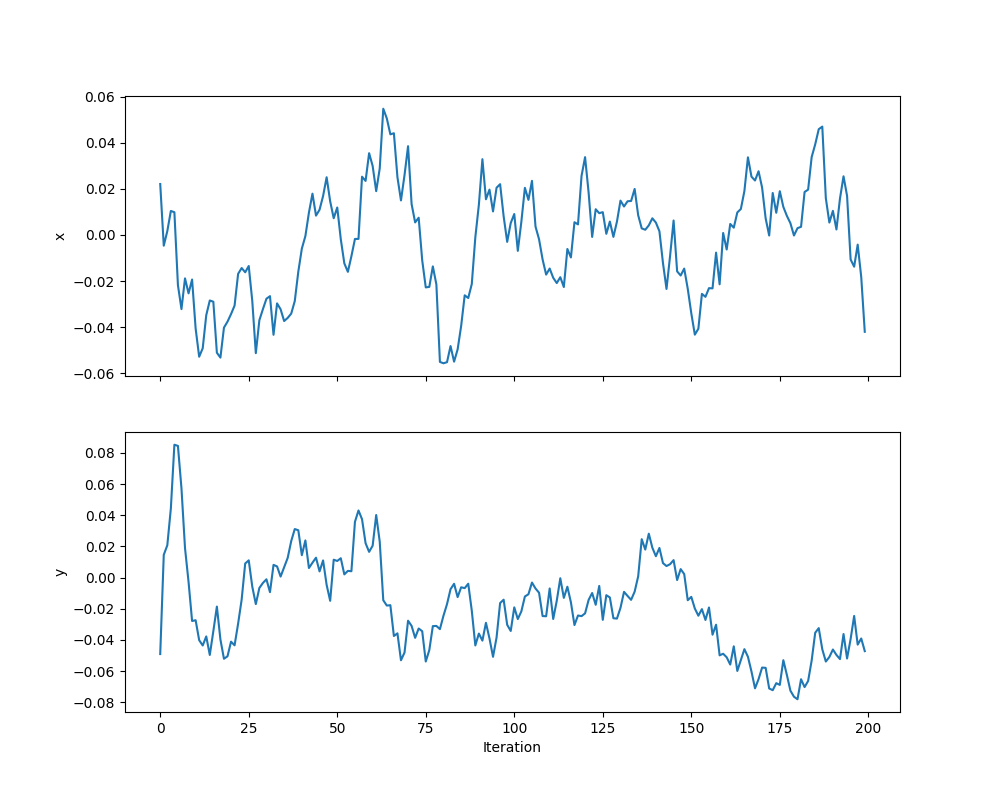

In [28]:
Image(filename="samples_chain.png", width=640, height=480)

By default, this program will average the chains over all of the walkers. This is why there was a single line. However, you can plot each walker separately by adding the option `--walkers all`. **Try it!**

### The acceptance rate

This plots the acceptance rate, which for `emcee` is the average number of proposals that were accepted for each walker (aka the [acceptance fraction](http://dfm.io/emcee/current/api/#emcee.EnsembleSampler.acceptance_fraction)).

*Note: for the `emcee` and `emcee_pt` samplers, the average is done over all iterations since the last checkpoint. Since we are using no checkpointing here (see the next tutorial for details on checkpointing), this is the average over all iterations.*

In [29]:
!pycbc_inference_plot_acceptance_rate --input-file normal2d.hdf \
    --output-file acceptance_rate.png \
    --verbose

2019-05-12 09:28:43,228 Reading input file
2019-05-12 09:28:43,233 Plotting acceptance fraction
2019-05-12 09:28:43,292 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-12 09:28:43,401 STREAM 'IHDR' 16 13
2019-05-12 09:28:43,401 STREAM 'sBIT' 41 4
2019-05-12 09:28:43,401 'sBIT' 41 4 (unknown)
2019-05-12 09:28:43,401 STREAM 'pHYs' 57 9
2019-05-12 09:28:43,401 STREAM 'tEXt' 78 57
2019-05-12 09:28:43,401 STREAM 'IDAT' 147 8192
2019-05-12 09:28:43,445 Done


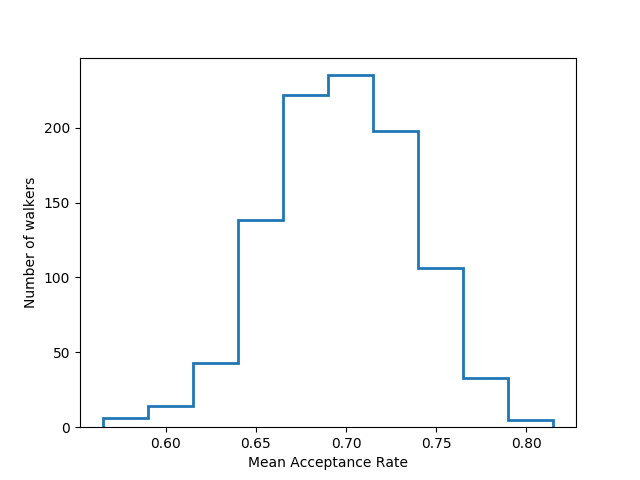

In [30]:
Image(filename="acceptance_rate.png", width=640, height=480)

### A movie of the results

We can use `pycbc_inference_plot_movie` to make a movie showing how each of the walkers evolved with time.

*Note: this requires `ffmpeg` to be installed.*

In [ ]:
# for this we need ffmpeg... this may or may not work
!conda install -y ffmpeg

In [40]:
# if that did work...
!pycbc_inference_plot_movie --verbose \
        --nprocesses 4 \
        --input-file normal2d.hdf \
        --output-prefix frames-normal2d \
        --movie-file normal2d_mcmc_evolution.mp4 \
        --cleanup \
        --plot-scatter \
        --plot-contours \
        --plot-marginal \
        --z-arg 'loglikelihood:$\log p(h|\vartheta)$' \
        --frame-step 1

2019-05-10 17:42:02,024 Loading parameters
2019-05-10 17:42:02,024 Reading input file normal2d.hdf
2019-05-10 17:42:02,040 Getting samples for colorbar
2019-05-10 17:42:02,048 Choosing common characteristics for all figures
2019-05-10 17:42:02,065 Making frames
2019-05-10 17:42:03,042 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0 to DejaVu Sans (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-10 17:42:03,051 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0 to DejaVu Sans (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-10 17:42:03,057 findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral (u'/Users/cdcapano/.virtual

2019-05-10 17:42:03,169 findfont: Matching :family=STIXSizeTwoSym:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXSizeTwoSym (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf') with score of 0.050000
2019-05-10 17:42:03,170 findfont: Matching :family=STIXNonUnicode:style=normal:variant=normal:weight=bold:stretch=normal:size=10.0 to STIXNonUnicode (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf') with score of 0.000000
2019-05-10 17:42:03,178 findfont: Matching :family=STIXNonUnicode:style=italic:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXNonUnicode (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf') with score of 0.050000
2019-05-10 17:42:03,182 findfont: Matching :family=cmb10:style=normal:variant=normal:weight=normal:stretch=normal:size=1

2019-05-10 17:42:03,280 findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-10 17:42:03,281 findfont: Matching :family=cmss10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmss10 (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf') with score of 0.050000
2019-05-10 17:42:03,283 findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=bold:stretch=normal:size=10.0 to DejaVu Sans (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf') with score of 0.000000
2019-05-10 17:42:03,283 findfont: Matching :family=cmsy10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmsy10 (u'/Users/cdcapano/.virt

2019-05-10 17:42:03,763 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=18.0 to DejaVu Sans (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-10 17:42:03,788 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=18.0 to DejaVu Sans (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-10 17:42:03,811 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/Users/cdcapano/.virtualenvs/hm_chisq/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-05-10 17:42:03,817 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/Use

In [44]:
HTML("""
<video width="640" height="480" controls>
  <source src="normal2d_mcmc_evolution.mp4" type="video/mp4">
</video>
""")

## Other test distributions

Several other test models exist in the `pycbc.inference.models` package. They are the models that begin with `Test`. The full list:

|Name                   |Class                                                     |
|-----------------------|----------------------------------------------------------|
| ``'test_eggbox'``     | [TestEggbox](http://pycbc.org/pycbc/latest/html/pycbc.inference.models.html#pycbc.inference.models.analytic.TestEggbox) |
| ``'test_normal'``     | [TestNormal](http://pycbc.org/pycbc/latest/html/pycbc.inference.models.html#pycbc.inference.models.analytic.TestNormal) |
| ``'test_prior'``      | [TestPrior](http://pycbc.org/pycbc/latest/html/pycbc.inference.models.html#pycbc.inference.models.analytic.TestPrior) |
| ``'test_rosenbrock'`` | [TestRosenbrock](http://pycbc.org/pycbc/latest/html/pycbc.inference.models.html#pycbc.inference.models.analytic.TestRosenbrock) |
| ``'test_volcano'``    | [TestVolcano](http://pycbc.org/pycbc/latest/html/pycbc.inference.models.html#pycbc.inference.models.analytic.TestVolcano) |


## Challenges:
 1. Repeat the above analysis, but test on a 3D Rosenbrock distribution using the [TestRosenbrock](http://pycbc.org/pycbc/latest/html/pycbc.inference.models.html#pycbc.inference.models.analytic.TestRosenbrock) model. Call the third variable `z`, and set its prior to be uniform $\in [0, 10)$. Change the name of the output file so as not to overwrite your previous results.

 2. Repeat the 3D Rosenbrock challenge, but using `emcee_pt` as the sampler. Use 4 temperatures.